In [1322]:
## for my knn project I have chose to classify different types of drugs, I got my dataset from here:
# https://www.kaggle.com/datasets/prathamtripathi/drug-classification.

## knn is a supervised algorithm that classifies a data point that is close to other data points, this is done with picking the 
## value of k. picking the value of k is done by trial and error.

In [1323]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [1324]:
dataset = pd.read_csv("drug200.csv")

In [1325]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [1326]:
features = ['BP', 'Cholesterol', 'Na_to_K']
X = dataset[features]
y = dataset['Drug']

In [1327]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [1328]:
## here I iterate through the BP column to find all types of BP levels
s = set()
for x in dataset['BP']:
    s.add(x)
print(s)

{'HIGH', 'NORMAL', 'LOW'}


In [1329]:
dataset['BP'] = dataset['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})
print(dataset['BP'])

0      2
1      0
2      0
3      1
4      0
      ..
195    0
196    0
197    1
198    1
199    0
Name: BP, Length: 200, dtype: int64


In [1330]:
## here I iterate through the Cholesterol column to find all types of Cholesterol levels
s = set()
for x in dataset['Cholesterol']:
    s.add(x)
print(s)

{'HIGH', 'NORMAL'}


In [1331]:
dataset['Cholesterol'] = dataset['Cholesterol'].map({'NORMAL':0, 'HIGH':1})
print(dataset['Cholesterol'])

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    0
199    0
Name: Cholesterol, Length: 200, dtype: int64


In [1332]:
# features = [['BP', 'Cholesterol' ,'Na_to_K']]
# features

# X = dataset[features]
# y = dataset['Drug']

# X = features

X = dataset[['BP', 'Cholesterol', 'Na_to_K']]
y = dataset['Drug']

In [1333]:
# dataset
X

,BP,Cholesterol,Na_to_K
0,2,1,25.355
1,0,1,13.093
2,0,1,10.114
3,1,1,7.798
4,0,1,18.043
...,...,...,...
195,0,1,11.567
196,0,1,12.006
197,1,1,9.894
198,1,0,14.020


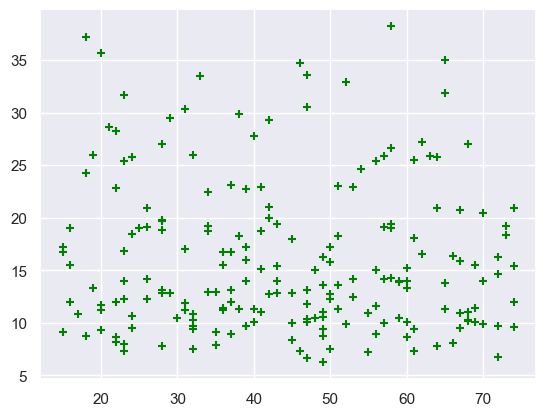

In [1334]:
plt.scatter(dataset['Age'], dataset['Na_to_K'], color='green', marker='+')

In [1335]:
from sklearn.model_selection import train_test_split

In [1336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [1337]:
len(X_train)

160

In [1338]:
len(X_test)

40

In [1339]:
from sklearn.neighbors import KNeighborsClassifier

In [1340]:
knn = KNeighborsClassifier(n_neighbors=3)

In [1341]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1342]:
print("models score is:", knn.score(X_train, y_train) * 100)

pred = knn.predict(X_test)

models score is: 92.5


In [1343]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pred)

In [1344]:
matrix

array([[19,  0,  0,  0,  0],
       [ 0,  4,  3,  0,  1],
       [ 0,  1,  0,  0,  0],
       [ 1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 10]])

{'drugC', 'drugX', 'DrugY', 'drugB', 'drugA'}


Text(54.75, 0.5, 'Truth')

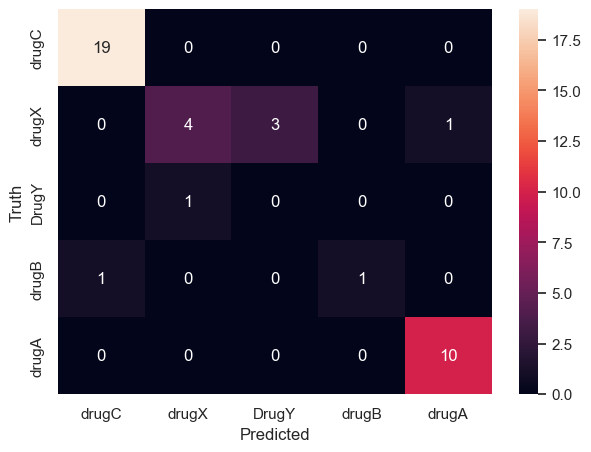

In [1345]:
# import seaborn as sns; sns.set()
# sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')

# class_names = ['BP', 'Col', 'Na-K', 'drug', 'Class 4']

drugs = set()
for c in dataset['Drug']:
    drugs.add(c)
print(drugs)

classes = drugs

import seaborn as sn
plt.figure(figsize=(7, 5))
sn.heatmap(matrix, annot=True, xticklabels=drugs, yticklabels=drugs)
plt.xlabel('Predicted')
plt.ylabel('Truth')